In [1]:
import librosa
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
y, sr = librosa.load(r"D:\my_knowledge\research_assistant\python_project\speech_recognition\audio\song_demo.mp3")

In [3]:
f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))

In [4]:
len(f0)

2421

In [5]:
type(f0)

numpy.ndarray

In [6]:
times = librosa.times_like(f0)

In [7]:
len(times)

2421

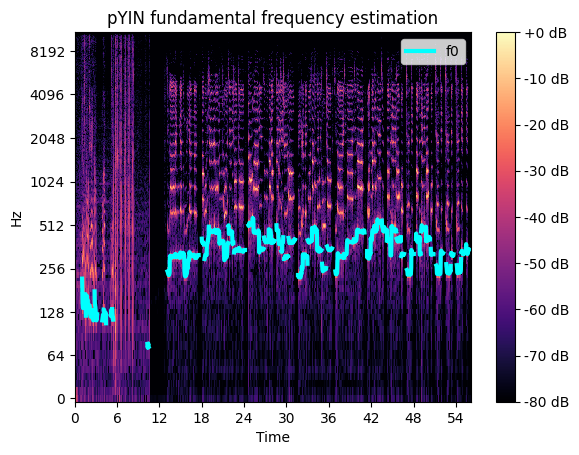

In [8]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [10]:
f0 = f0[~np.isnan(f0)]

In [150]:
f0 = np.diff(f0)

In [151]:
peaks = librosa.util.peak_pick(f0, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.5, wait=10)

In [152]:
peaks

array([  3,  17,  37,  57,  77,  91, 105, 118], dtype=int64)

Text(0, 0.5, 'Y')

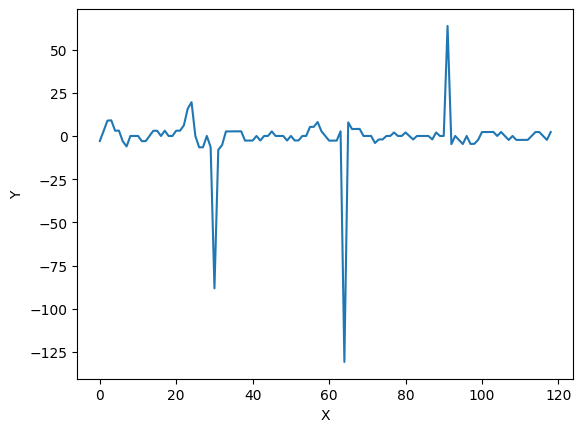

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一维ndarray
x = np.arange(0, 119, 1)  # 创建从0到9的一维数组

# 绘制折线图
plt.plot(x, f0)

# 添加标题和标签
plt.title('')
plt.xlabel('X')
plt.ylabel('Y')